<a href="https://colab.research.google.com/github/pallavibekal/IISC---Statistics-and-Probability/blob/main/2200092_M1_AST_05_Bayesian_Inference_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 5: Bayesian Inference

## Learning Objectives

At the end of the experiment, you will be able to

* understand the terms like maximum likelihood estimates, priors, conjugate priors
* apply the concept of Bayesian inference

## Information

**Why we need Bayesian inference?**

In general, statistical inference is the process of determining properties of a model/distribution, given some data. Bayesian inference can be seen as the Bayesian counterpart to frequentist inference. In Frequentist inference, there is usually the notion of some true, unknown, parameter which is a constant, and point estimates are inferred from data. Contrarily, Bayesian inference treats the model parameters as random variables and usually wants to deduce probabilistic statements about the distribution of parameters.

**Terminology**

The basic terms related to Bayesian inference are as follows:

- **Prior:** the probability distribution that would express one's beliefs about an uncertain quantity before some evidence is taken into account.
- **Posterior:**  in Bayesian statistics, it is the revised or updated probability of an event occurring after taking into consideration new information.

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2200092" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9686800288" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M1_AST_05_Bayesian_Inference_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm, beta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Bayesian Inference

Bayesian inference utilizes the famous Bayes rule:

$$ P(A|B) = \frac{P(B|A).P(A)}{P(B)} $$

For model based inference, we can replace  $A$  with the parameters  $θ$  and  $B$  with the data  $D$  at interest. Furthermore, we can introduce  $I$  which can be used to introduce an additional assumption (knowledge) to the inference such as which model to use.

$$ \overbrace{P(\theta| D, I)}^{\text{posterior}} = \frac{\overbrace{P(D | \theta, I)}^{\text{likelihood}}\overbrace{P(\theta|I)}^{\text{prior}}}{\underbrace{P(D|I)}_{\text{marginal likelihood}}} $$

The prior distribution  $P(θ|I)$ specifies our assumption about the parameters  $θ$  before taking the data into account. The likelihood  $P(D|θ,I)$  represents the probability of the data if the parameters  $θ$  are specified. The marginal likelihood (or evidence)  $P(D|I)$  is the distribution of the data  $D$  given our additional assumption  $I$ . It is the normalization of the Bayes rule and plays an important role in model comparison. Finally, the posterior  $P(θ|D,I)$  is the distribution of the parameters after taking the observed data  $D$  and our additional (prior) assumption  $I$  into account. We can also say that the posterior is proportional to the likelihood and the prior.

$$ posterior ∝ likelihood × prior $$

To understand Bayesian inference interactively, click [here](https://seeing-theory.brown.edu/bayesian-inference/index.html).

**Exercise 1:** We believe the probability of getting heads in a coin toss to be some true value p, but have no prior opinion on what p is. So we flip a coin a few times and record what's observed for each flip. Let's see how do our beliefs change as we observe more data?

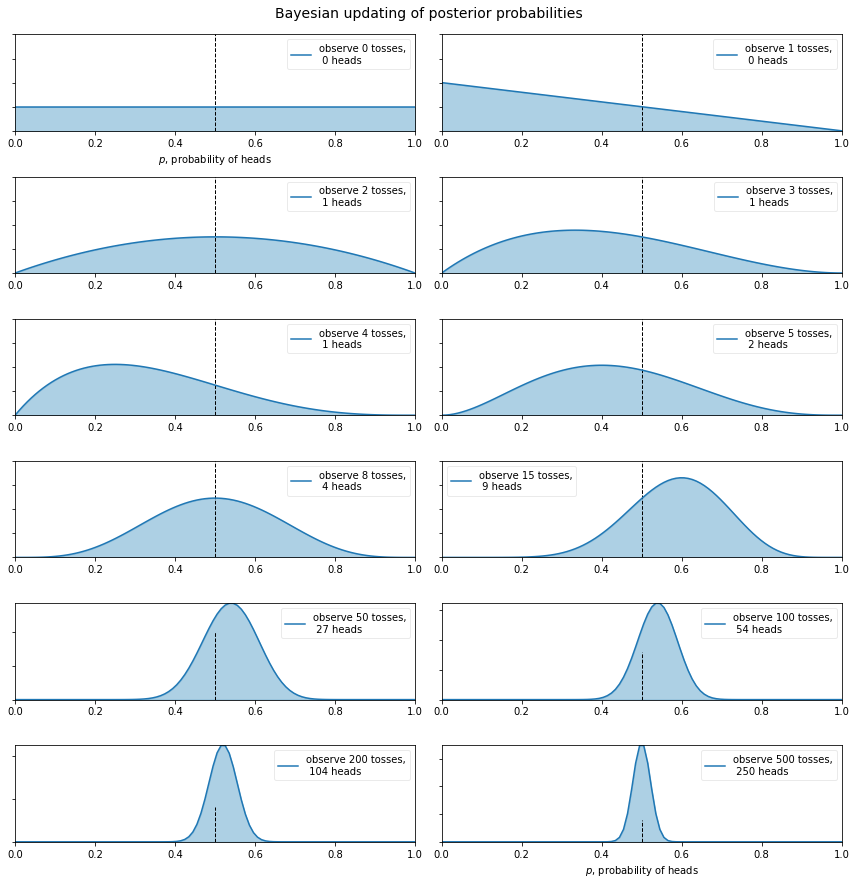

In [5]:
plt.figure(figsize=(12, 12))

n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 100, 200, 500]    # specify different number of trials
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])         # store the outcome of 500 coin tosses
x = np.linspace(0, 1, 100)                                 # possible values for probability

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel('$p$, probability of heads') if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()                # get number of heads from N trials
    a = 1                                 # alpha parameter for Beta distribution as prior
    b = 1                                 # beta parameter for Beta distribution as prior
    s = heads                             # number of successes observed in N trials
    f = N-heads                           # number of failures observed in N trials
    y = beta.pdf(x, a+s, b+f)             # posterior as Beta distribution with alpha= a+s, beta= b+f
    plt.plot(x, y, label='observe %d tosses,\n %d heads' % (N, heads))         # visualize posterior for N trials
    plt.fill_between(x, 0, y, color='#348ABD', alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

From the above plots following observations can be made:

* belief under no information is that all possible heads probabilities are equally likely (as in the case of 0 tosses above)
* it may not be possible for a small number of observations to represent the true probability (as in the case of 3 tosses above)
* small sample sizes are incredibly sensitive to minor imbalances in outcome counts
* as the sample size grows, the pdf gets narrow and more probability is allocated to  p=0.5 

### Prior

In Bayesian statistical inference, a prior probability distribution, often simply called the *prior*, of an uncertain quantity is the probability distribution that would express one's beliefs about this quantity before some evidence is taken into account.

**Exercise 2:** We are observing whether a coin flip results in "heads" or "tails". We are not sure whether the coin at interest is fair or whether it might be biased due to some asperity or similar things. Thus, we want to conduct statistical inference of the parameter  p, which should describe the probability of flipping "heads", by utilizing the Bayesian framework. The probability of flipping "tails" is simply  1−p. Further, we consider a set of observations  D  by flipping the coin several times. Thus, by applying Bayes inference, we want to determine:

$$ P(p|D) \propto P(D|p) \times P(p) $$

**Model:**

As an underlying model, we can use the binomial distribution which is a discrete probability distribution for the number of successes in a sequence of n independent binary experiments (e.g., coin flips resulting in "heads" or "tails"). The binomial distribution is conditioned on the parameters  n  (number of trials) and  p  the probability of flipping "heads". The probability mass function of the binomial distribution, which determines the probability of observing  k  "heads" with parameters p and n, is defined as:

$$ f(k|p,n) = \binom nk p^k (1-p)^{n-k} $$

We can rewrite the above Bayes rules as:

$$ P(p|k,n) \propto P(k|p,n) \times P(p) $$

In case of the Binomial distribution as likelihood, we can use the Beta distribution as a conjugate prior. This means that also the posterior distribution will be of the same family (i.e., Beta distribution) as the prior distribution.

The beta distribution is a continuous probability distribution over the interval  [0,1] . The PDF of the Beta distribution is defined as:

$$ f(x|\alpha,\beta) =  \frac{1}{B(\alpha,\beta)} x^{\alpha-1}(1-x)^{\beta-1} =  \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, x^{\alpha-1}(1-x)^{\beta-1} $$

$B$  is the beta function and is a normalization constant to ensure that the probability integrates to 1. $Γ$ is the gamma function.

$α$ and $β$ are positive shape parameters controlling the shape of the distribution. If they are >=1, we can think of them as pseudo counts; i.e., counts before observing the data.

So for our example, α would specify the pseudo counts of observing a "heads" flip, while β would refer to the counts of observing a "tails" flip. 

Let's visualize some examples next for the case of $α$>=1 and $β$>=1.

In [6]:
# helper function for plotting
def plot_beta(a,b,ax, print_interval=True):
    ax.set_xlabel("p")
    ax.set_ylabel("probability density")
    x = np.linspace(0.00,1, 100)
    label = "$\\alpha= " + str(a) + ", \\beta=" + str(b) + "$"
    dist = beta(a,b)                                            # Beta distribution as prior having parameters alpha=a and beta=b
    # plot density
    ax.plot(x, dist.pdf(x), lw=2, alpha=0.6, label=label)       # visualize the prior for possible values of probability
    # determine the 95% highest density interval
    if print_interval:
        print("Interval containing 95% of the distribution: ", dist.interval(0.95))

Let us consider a symmetric Beta distribution. This means that we want to express our prior belief that the coin is fair. We can express this prior with the shape parameters  α  and  β  which we can interpret as pseudo counts. As we have a fair belief, we set both shape parameters to the same value. Let us start with  α=β=10 .

Interval containing 95% of the distribution:  (0.2886432479169988, 0.7113567520830012)


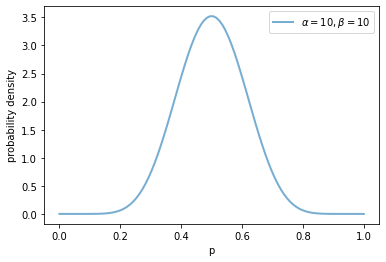

In [7]:
fig, ax = plt.subplots(1,1)
plot_beta(10,10,ax)                                        # visualize prior for alpha= no. of heads= 10, beta= no. of tails= 10
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels);

It can be seen that the parameter  p=0.5  receives the highest density. However, as we keep our pseudo counts relatively low, we also allow other parameter configurations to receive a certain density. If we determine the interval containing 95% of the distribution, we receive  0.29  as the lower and  0.71  as the upper boundary.

In [ ]:
fig, ax = plt.subplots(1,1)
plot_beta(100,100,ax)                                      # visualize prior for alpha= no. of heads= 100, beta= no. of tails= 100
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels);

If we increase our symmetric shape parameters to a value of  100, we can see a much higher density for parameters around the fair probability of  0.5. The 95% highest density interval now lies between  0.43  and  0.71.

### Maximum Likelihood Estimate

Maximum likelihood estimation is a method that determines values for the parameters of a model. The parameter values are found such that they maximize the likelihood that the process described by the model produced the data that was actually observed.

**Exercise 3:** Let’s suppose we have observed 20 data points from the normal distribution process. Recall that the normal distribution has 2 parameters. The mean, μ, and the standard deviation, σ. Different values of these parameters result in different curves. We want to know which curve was most likely responsible for creating the data points that we observed?.

Maximum likelihood estimation is a method that will find the values of μ and σ that result in the curve that best fits the data. The values that we find are called the maximum likelihood estimates (MLE).

In [8]:
# Create 20 data points from normal distribution
mu = 5           # actual mean
sd = 2.5         # actual standard deviation
data = stats.norm.rvs(mu, sd, 20)          # generate 20 data points from normal distribution
data

array([1.54527349, 1.5822794 , 9.76924098, 5.34049533, 3.80227201,
       6.69174225, 8.69992053, 4.05429568, 4.29796215, 9.63692317,
       5.98591034, 4.18053069, 6.53349027, 8.16454079, 6.22643302,
       2.14664599, 6.03791688, 5.60565051, 3.27993662, 7.09954499])

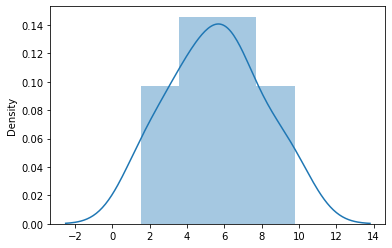

In [9]:
# Plot the density curve
sns.distplot(data)

We want to calculate the total probability of observing all of the data, i.e. the joint probability distribution of all observed data points. To do this we would need to calculate some conditional probabilities, which can get very difficult. So it is here that we’ll make our first assumption. The assumption is that each data point is generated independently of the others. This assumption makes the maths much easier. If the events (i.e. the process that generates the data) are independent, then the total probability of observing all of the data is the product of observing each data point individually (i.e. the product of the marginal probabilities).

The probability density of observing a single data point x, that is generated from a Gaussian(or Normal) distribution is given by:

$$ P(x;μ,σ) =  \frac{1}{σ\sqrt{2π}}e^{\frac{-(x-μ)^2}{2σ^2}} $$

The total (joint) probability density of observing all data points is given by:

$$ P(x_1, x_2,...;μ,σ) =  \frac{1}{σ\sqrt{2π}}  e^{\frac{-(x_1-μ)^2}{2σ^2}} \times  \frac{1}{σ\sqrt{2π}}  e^{\frac{-(x_2-μ)^2}{2σ^2}} \times  ...  \times  \frac{1}{σ\sqrt{2π}}  e^{\frac{-(x_n-μ)^2}{2σ^2}} $$

We need to find out the values of μ and σ that result in giving the maximum value of the above expression.

The above expression for the total probability is hard to differentiate, so it is simplified by taking the natural logarithm of the expression. The natural logarithm is a monotonically increasing function. This means that if the value on the x-axis increases, the value on the y-axis also increases. It ensures that the maximum value of the log of the probability occurs at the same point as the original probability function. Therefore we work with the simpler log-likelihood instead of the original likelihood.

Taking logs of the original expression gives us:

$$ ln(P(x;μ,σ)) =  ln\frac{1}{σ\sqrt{2π}} - \frac{(x_1-μ)^2}{2σ^2} + ln\frac{1}{σ\sqrt{2π}} - \frac{(x_2-μ)^2}{2σ^2} \ +  ... + ln\frac{1}{σ\sqrt{2π}} - \frac{(x_n-μ)^2}{2σ^2} $$

Using the laws of logarithms:

$$ ln(P(x;μ,σ)) =  -n.ln(σ) - \frac{n}{2}ln(2\pi) - \frac{1}{2σ^2}[(x_1-μ)^2 + (x_2-μ)^2 + ... + (x_n-μ)^2] $$

To find the MLE of the mean(μ), take the partial derivative of the function with respect to μ, giving:

$$ \frac{d\ ln(P(x;μ,σ))}{dμ} =  \frac{1}{σ^2}[-n.μ + x_1 + x_2 + ... + x_n] $$

Finally, setting the left hand side of the equation to zero and then rearranging for μ gives:

$$ μ = \frac{\sum{x_i}}{n} $$

In [10]:
# Calculate maximum likelihood estimate for μ
mu_mle = sum(data)/len(data)
mu_mle

5.534050254572579

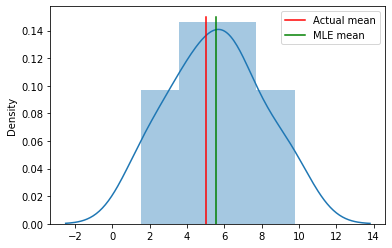

In [11]:
sns.distplot(data)
plt.plot([mu,mu], [0,0.15], 'red', label= 'Actual mean')            # plot the actual mean
plt.plot([mu_mle,mu_mle], [0,0.15], 'green', label= 'MLE mean')     # plot the estimated mean
plt.legend()
plt.show()

Similarly, to find the MLE of the standard deviation(σ), take the partial derivative of the function with respect to σ, giving:

$$ \frac{d\ ln(P(x;μ,σ))}{dσ} =  -\frac{n}{σ}  + \frac{1}{σ^3}[(x_1-μ)^2 + (x_2-μ)^2 + ... + (x_n-μ)^2] $$

Finally, setting the left hand side of the equation to zero and then rearranging for σ gives:

$$ σ = \sqrt{\frac{\sum_1^n{(x_i-μ)^2}}{n}} $$

In [12]:
# Calculate the maximum likelihood estimate for σ
sd_mle = np.sqrt(sum((data-mu_mle)**2) / len(data))

print('Actual SD: {:.3}'.format(sd))          # display the actual standard deviation
print('MLE SD: {:.3}'.format(sd_mle))         # display the estimated standard deviation

Actual SD: 2.5
MLE SD: 2.39


### Conjugate Prior

In Bayesian probability theory, if the posterior distributions $p(θ | x)$ are in the same probability distribution family as the prior probability distribution $p(θ)$, the prior and posterior are then called conjugate distributions, and the prior is called a *conjugate prior* for the likelihood function $p(x | θ)$. 

For example, the Gaussian family is conjugate to itself (or self-conjugate) with respect to a Gaussian likelihood function: if the likelihood function is Gaussian, choosing a Gaussian prior over the mean will ensure that the posterior distribution is also Gaussian. This means that the Gaussian distribution is a conjugate prior for the likelihood that is also Gaussian. 

The concept, as well as the term "conjugate prior", was introduced by Howard Raiffa and Robert Schlaifer in their work on Bayesian decision theory. A similar concept had been discovered independently by George Alfred Barnard.

Consider the general problem of inferring a (continuous) distribution for a parameter $θ$ given some data $x$. From Bayes' theorem, the posterior distribution is equal to the product of the likelihood function ${\displaystyle \theta \mapsto p(x\mid \theta )\!}$ and prior ${\displaystyle p(\theta )\!}$, normalized (divided) by the probability of the data ${\displaystyle p(x)\!}$:

$$ p(θ\ |\ x) = \frac{p(x\ |\ θ).p(θ)}{p(x)} $$

$$ \   \   \    = \frac{p(x\ |\ θ).p(θ)}{∫_{θ'}p(x,θ')dθ'} $$

$$ \   \   \    = \frac{p(x\ |\ θ).p(θ)}{∫_{θ'}p(x\ |\ θ')p(θ')dθ'} $$

Note: denominator not a function of θ ⇒ just normalizing term

$$ \underbrace{p(θ)}_{parametric}\ \   \mapsto \ \  \underbrace{p(x\ |\ θ)}_{parametric}p(θ) \ \  \mapsto \ \ P(θ\ |\ x) \propto \underbrace{p(x\ |\ θ)p(θ)}_{mess?} $$

Conjugacy: require $p(θ)$ and $p(\ θ |\ x)$ to be of the same form. For example, for binomial likelihood, the beta prior becomes a beta posterior.

$$ \underbrace{p(θ)}_{beta}\ \   \mapsto \ \  \underbrace{p(x\ |\ θ)}_{binomial}p(θ) \ \  \mapsto \ \ \underbrace{P(θ\ |\ x)}_{beta} $$

$p(θ)$ and $p(θ\ |\ x)$ are then called conjugate distributions.

Some of the conjugate priors are shown in the table below

|  Likelihood  |  Model parameters  |   Conjugate Prior   |   Posterior |
|:--------------|:-----------|:------------|:------------|
|  Bernoulli  | *p* (probability) |  Beta    |   Beta      |
|  Binomial  | *p* (probability) |  Beta    |   Beta      |
|  Negative Binomial  | *p* (probability) |  Beta    |   Beta      |
|  Poisson  | *λ* (rate) |  Gamma    |   Gamma      |
|  Geometric  | *p* (probability) |  Beta    |   Beta      |
|  Exponential  | *λ* (rate) |  Gamma    |   Gamma      |
|  Normal (with known variance)  | *μ* (mean) |  Normal    |   Normal      |
|  Normal (with known mean)  | *$σ^2$* (variance) |  Inverse Gamma    |   Inverse Gamma      |
|  Multinomial  | *p* (probability vector) |  Dirichlet    |   Dirichlet      |


To know more about other conjugate priors click [here](https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions).

### Please answer the questions below to complete the experiment:




In [14]:
# @title 1. Which of the following is meaningful only if one takes a Bayesian view of probability?  { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "Probabilistic curve-fitting with the model parameters treated as random variables" #@param ["","Probabilistic curve-fitting with a gaussian noise model","Probabilistic curve-fitting with the model parameters treated as random variables", "Probabilistic curve-fitting to obtain a predictive distribution for test data"]

In [13]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Was Tough, but I did it" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [16]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Probability and Distributions was a difficult topic for me. I am not sure what could have changed" #@param {type:"string"}


In [18]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [19]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [21]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [22]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1317
Date of submission:  17 Jul 2021
Time of submission:  19:36:10
View your submissions: https://cds.iisc.talentsprint.com/notebook_submissions
